In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.DataWriter import DataWriter
INTERSECTION_HUMAN = {
    0: 'Fourway',
    1: 'Traffic lights',
    2: 'Equivalent',
    3: 'Smart lights'
}

def get_parameters(p_spawn=0.1, max_speed_horizontal=10, max_speed_vertical=10, intersection_type=0):
    t_traffic_light_cycle=5
    p_bend = 0.33
    p_u_turn = 0.01
    p_left = p_bend
    p_right = p_bend
    p_straight = p_bend
    t_from_north = t_traffic_light_cycle
    t_from_west = t_traffic_light_cycle
    t_from_east = t_traffic_light_cycle
    t_from_south = t_traffic_light_cycle

    intersection_type = int(intersection_type)
    intersections = ['Fourway', 'Traffic lights', 'Equivalent', 'Smart lights']
    intersection = intersections[intersection_type]

    parameters = {
        "max_speed_horizontal": max_speed_horizontal,
        "max_speed_vertical": max_speed_vertical,
        "bmw_fraction": 0.1,
        "seed": 1337,
        "intersection_type": intersection,
        "t_from_north": t_from_north,
        "t_from_west": t_from_west,
        "t_from_east": t_from_east,
        "t_from_south": t_from_south,
        "p_car_spawn_north": p_spawn,
        "p_north_to_north": p_u_turn,
        "p_north_to_west": p_right,
        "p_north_to_east": p_left,
        "p_north_to_south": p_straight,
        "p_car_spawn_west": p_spawn,
        "p_west_to_north": p_left,
        "p_west_to_west": p_u_turn,
        "p_west_to_east": p_straight,
        "p_west_to_south": p_right,
        "p_car_spawn_east": p_spawn,
        "p_east_to_north": p_right,
        "p_east_to_west": p_straight,
        "p_east_to_east": p_u_turn,
        "p_east_to_south": p_left,
        "p_car_spawn_south": p_spawn,
        "p_south_to_north": p_straight,
        "p_south_to_west": p_left,
        "p_south_to_east": p_right,
        "p_south_to_south": p_u_turn,
    }
    return parameters

def get_mean_last_runs(dataset, i):
    n = len(dataset)
    k = n - i
    return float(dataset[-1] * n - dataset[k] * k) / float(i)

In [2]:
def throughput_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        throughput = []
        maximal_speed = []
        for max_speed in range(3, 24):
            max_speed_horizontal = max_speed_vertical = max_speed
            parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            throughput.append(get_mean_last_runs(data['results']['throughput'], 900))
            maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
        plt.scatter(maximal_speed, throughput, label=INTERSECTION_HUMAN[intersection_type])
    plt.legend()
    plt.xlabel('Maximal speed')
    plt.ylabel('Throughput')
    plt.show()
    
def mean_crossover_vs_maximal_speed(**kwargs):
    p_spawn = kwargs['p_spawn']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        mean_crossover = []
        maximal_speed = []
        for max_speed in range(3, 24):
            max_speed_horizontal = max_speed_vertical = max_speed
            parameters = get_parameters(p_spawn, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            mean_crossover.append(data['results']['mean_crossover_time'][-1])
            maximal_speed.append((data['parameters']['max_speed_vertical'] + data['parameters']['max_speed_horizontal']) / 2.0)
        plt.scatter(maximal_speed, mean_crossover, label=INTERSECTION_HUMAN[intersection_type])
    plt.legend()
    plt.xlabel('Maximal speed')
    plt.ylabel('Mean crossover time')
    plt.show()
    
def throughput_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        throughput = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            throughput.append(data['results']['throughput'][-1])
        plt.scatter(p_spawn, throughput, label=INTERSECTION_HUMAN[intersection_type])
    plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Throughput')
    plt.show()
    
def mean_crossover_vs_p_spawn(**kwargs):
    max_speed_horizontal = kwargs['max_speed_horizontal']
    max_speed_vertical = kwargs['max_speed_vertical']
    datawriter = DataWriter()
    for intersection_type in [0, 1, 2, 3]:
        mean_crossover = []
        p_spawn = []
        for p in range(1, 10):
            p = p / 10.0
            parameters = get_parameters(p, max_speed_horizontal, max_speed_vertical, intersection_type)
            data = datawriter.get_runs_by_parameters(parameters)
            p_spawn.append(p)
            mean_crossover.append(data['results']['mean_crossover_time'][-1])
        plt.scatter(p_spawn, mean_crossover, label=INTERSECTION_HUMAN[intersection_type])
    plt.legend()
    plt.xlabel('Spawning probability')
    plt.ylabel('Mean crossover time')
    plt.show()

def plots_1(**kwargs):
    throughput_vs_maximal_speed(**kwargs)
    mean_crossover_vs_maximal_speed(**kwargs)
    throughput_vs_p_spawn(**kwargs)
    mean_crossover_vs_p_spawn(**kwargs)

Inserted run with id 115
Inserted run with id 116
Inserted run with id 117
Inserted run with id 118
Inserted run with id 119
Inserted run with id 120
Inserted run with id 121
Inserted run with id 122
Inserted run with id 123
Inserted run with id 124
Inserted run with id 125
Inserted run with id 126
Inserted run with id 127
Inserted run with id 128
Inserted run with id 129
Inserted run with id 130
Inserted run with id 131
Inserted run with id 132
Inserted run with id 133
Inserted run with id 134
Inserted run with id 135
Inserted run with id 136
Inserted run with id 137
Inserted run with id 138
Inserted run with id 139
Inserted run with id 140
Inserted run with id 141
Inserted run with id 142
Inserted run with id 143
Inserted run with id 144
Inserted run with id 145
Inserted run with id 146
Inserted run with id 147
Inserted run with id 148
Inserted run with id 149
Inserted run with id 150
Inserted run with id 151
Inserted run with id 152
Inserted run with id 153
Inserted run with id 154


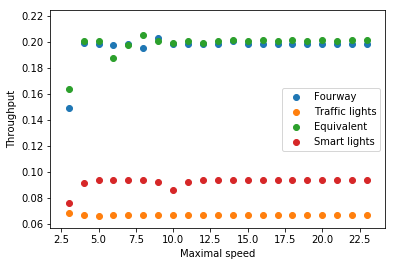

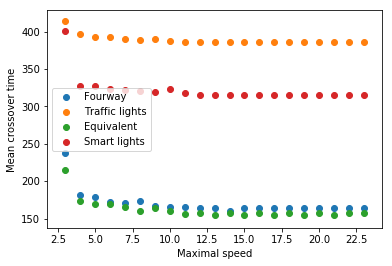

Inserted run with id 158
Inserted run with id 159
Inserted run with id 160
Inserted run with id 161
Inserted run with id 162
Inserted run with id 163
Inserted run with id 164
Inserted run with id 165
Inserted run with id 166
Inserted run with id 167
Inserted run with id 168
Inserted run with id 169
Inserted run with id 170
Inserted run with id 171
Inserted run with id 172
Inserted run with id 173
Inserted run with id 174
Inserted run with id 175
Inserted run with id 176
Inserted run with id 177
Inserted run with id 178
Inserted run with id 179
Inserted run with id 180
Inserted run with id 181
Inserted run with id 182
Inserted run with id 183
Inserted run with id 184
Inserted run with id 185
Inserted run with id 186


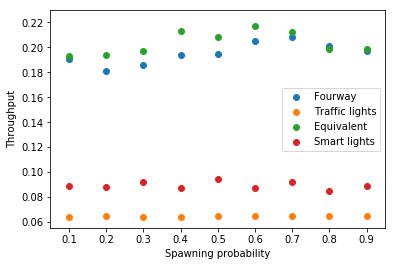

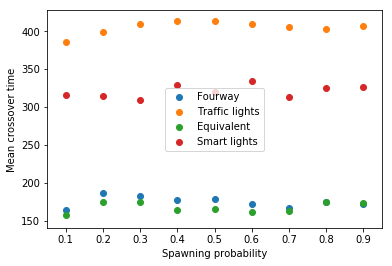

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plots_1(p_spawn=0.1, max_speed_horizontal=12, max_speed_vertical=12)



y=0.793939393939394x+0.5333333333333332 with R^2=0.7133474664338862


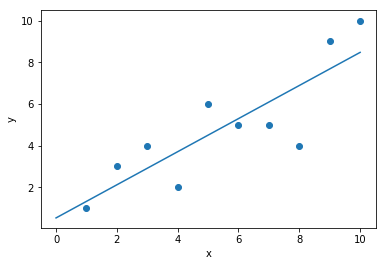

In [4]:
# Fit line to data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1, 3, 4, 2, 6, 5, 5, 4, 9, 10]).reshape(-1, 1)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)
a = model.coef_
b = model.intercept_
R2 = model.score(x, y)
print("y={}x+{} with R^2={}".format(a[0][0], b[0], R2))

# predict y from the data
x_new = np.linspace(0, 10, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [ ]:
interact(plots_1, p_spawn=(0.1, 1, 0.1), max_speed_horizontal=(3, 24), max_speed_vertical=(3, 24))

Text(0, 0.5, 'Mean crossover time')

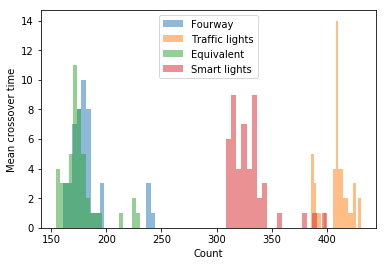

In [10]:
# Histograms
# set some parameters :
speeds = range(3, 15)
p_spawn=[0.1,0.3, 0.6,0.9]

cross_dict = {}

for intersection in INTERSECTION_HUMAN.keys():
    mean_crossover_per_intersection = []
    for speed in speeds:
        for p in p_spawn:
            parameters = get_parameters(p, speed, speed, intersection)
            datawriter = DataWriter()
            data = datawriter.get_runs_by_parameters(parameters)
            mean_crossover_per_intersection.append(data['results']['mean_crossover_time'][-1])
    cross_dict[intersection] = mean_crossover_per_intersection

for key in cross_dict.keys():
    plt.hist(cross_dict[key],bins = 20, label = INTERSECTION_HUMAN[key], alpha = .5)
plt.legend()
plt.xlabel('Count')
plt.ylabel('Mean crossover time')

/home/roland/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


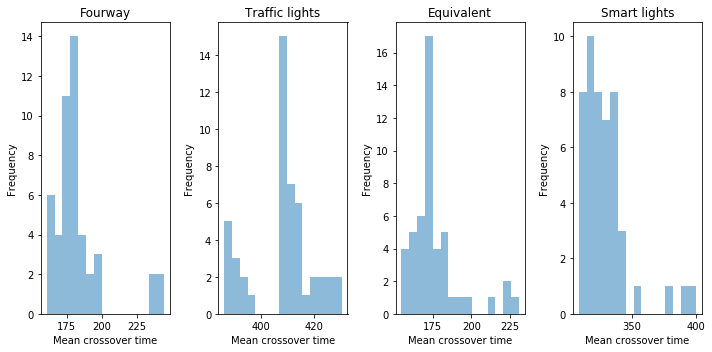

In [16]:
fig, axs = plt.subplots(1, 4, figsize = (10,5), sharey=False, tight_layout=True)

for key in cross_dict.keys():
    ind = keys.index(key)
    axs[ind].hist(cross_dict[key], bins = 15, label = INTERSECTION_HUMAN[key], alpha = .5)
    axs[ind].set_title(INTERSECTION_HUMAN[key])
    axs[ind].set_ylabel('Frequency')
    axs[ind].set_xlabel('Mean crossover time')